Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


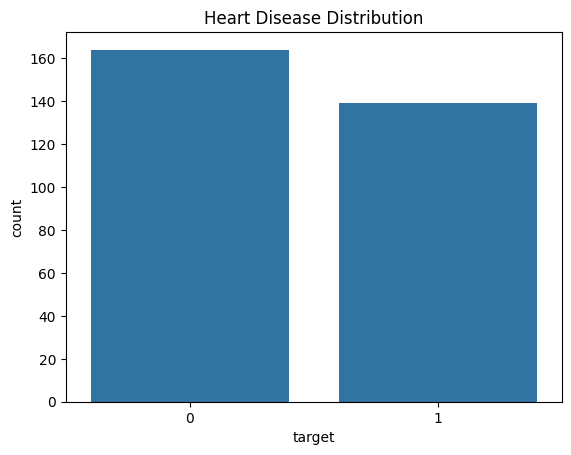

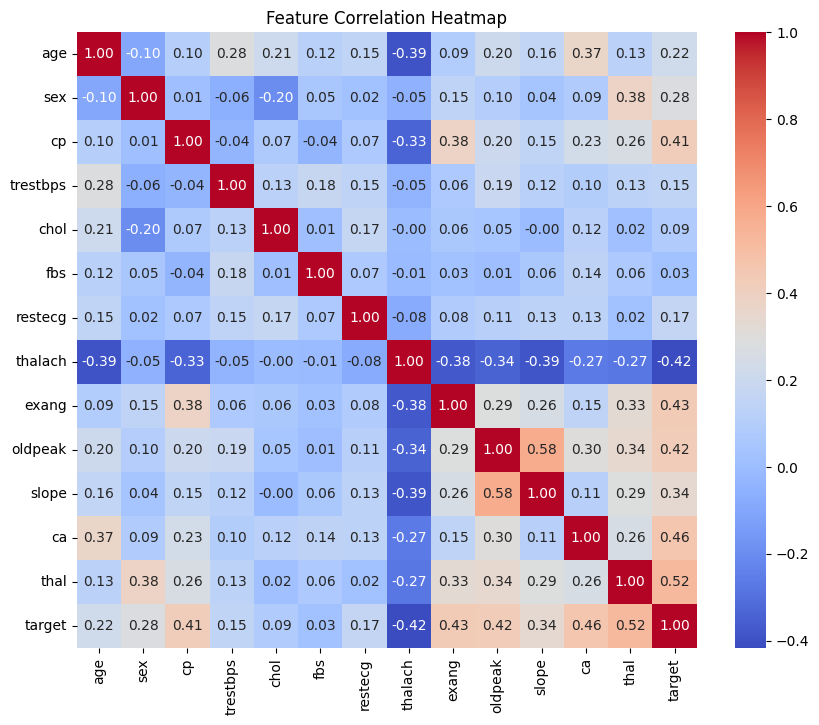

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




df = pd.read_csv("../data/processed.cleveland.csv", header=None, na_values="?")

# print(df.head())

# print("Shap:", df.shape)

columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target"
]

df.columns = columns
# print(df.head())

# HANDELING MISSING DATA
df.replace("?",np.nan , inplace=True)

for col in ["ca","thal"]:
    df[col]= pd.to_numeric(df[col],errors="coerce")

print("Missing values:\n", df.isnull().sum())

# FILL MISSING DATA
df.fillna(df.median(), inplace=True)

df["target"] = df["target"].apply(lambda x: 1 if x>0 else 0)

# SCALING
X = df.drop(["target"],axis=1)
y = df["target"]


# EDA
sns.countplot(x="target",data=df)
plt.title("Heart Disease Distribution")
plt.show()

# CORRELATION HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# df.to_csv("../data/heart_disease.csv",index=False)